In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('./data/dataframe.csv',sep=',', encoding='latin-1', header=[0, 1], index_col=0, low_memory=False,)
df

FECHA               HORA   CAUDAL Cal 1ria        \
      Unnamed: 1_level_1 Unnamed: 2_level_1 Entr l/s      Kg. Dosis   
0               1/1/2013                  0      NaN      NaN   NaN   
1               1/1/2013                  1    545.0      NaN   NaN   
2               1/1/2013                  2    538.0      NaN   NaN   
3               1/1/2013                  3    516.0      NaN   NaN   
4               1/1/2013                  4    526.0      NaN   NaN   
...                  ...                ...      ...      ...   ...   
73020         31/12/2020                 20    650.0      NaN   NaN   
73021         31/12/2020                 21    650.0      NaN   NaN   
73022         31/12/2020                 22    657.0      NaN   NaN   
73023         31/12/2020                 23    640.0      NaN   NaN   
73024         31/12/2020                 24    640.0      NaN   NaN   

      AGUA CRUDA                                      COAGULANTE          \
             p.H Color  NTU Alcalinidad Conductividad  Granulado Liquido   
0            NaN   NaN  NaN         NaN           NaN        NaN     NaN   
1            7.5   6.5  2.1         NaN           NaN        NaN     NaN   
2            NaN   NaN  NaN         NaN           NaN        NaN     NaN   
3            7.8   6.0  2.4         NaN           NaN        NaN     NaN   
4            NaN   NaN  NaN         NaN           NaN        NaN     NaN   
...          ...   ...  ...         ...           ...        ...     ...   
73020        7.1  14.2  4.7        25.0          51.1        NaN     NaN   
73021        7.3  14.8  4.6        25.0          52.2        NaN     NaN   
73022        7.3  13.1  4.4        24.0          50.4        NaN     NaN   
73023        7.2  12.8  4.2        24.0          51.7      500.0     NaN   
73024        7.4  12.5  4.3        24.0          51.9        NaN     NaN   

            AGUA TRATADA                              
      Dosis        Cloro Alcalinidad  p.H Color  NTU  
0       NaN          NaN         NaN  NaN   NaN  NaN  
1       NaN          1.2         NaN  6.8   2.8  0.7  
2       NaN          NaN         NaN  NaN   NaN  NaN  
3       NaN          1.2         NaN  6.9   3.0  0.6  
4       NaN          NaN         NaN  NaN   NaN  NaN  
...     ...          ...         ...  ...   ...  ...  
73020  25.0          1.4        12.0  6.2   4.4  1.8  
73021  25.0          1.4        14.0  6.3   4.6  1.8  
73022  25.0          1.5        14.0  6.4   4.6  1.8  
73023  25.0          1.5        14.0  6.3   4.2  1.8  
73024  25.0          1.5        14.0  6.3   4.2  1.8  

[73025 rows x 18 columns]


# Organización del DataFrame

In [3]:
#Column names
df.columns

MultiIndex([(       'FECHA', 'Unnamed: 1_level_1'),
            (        'HORA', 'Unnamed: 2_level_1'),
            (      'CAUDAL',           'Entr l/s'),
            (    'Cal 1ria',                'Kg.'),
            (    'Cal 1ria',              'Dosis'),
            (  'AGUA CRUDA',                'p.H'),
            (  'AGUA CRUDA',              'Color'),
            (  'AGUA CRUDA',                'NTU'),
            (  'AGUA CRUDA',        'Alcalinidad'),
            (  'AGUA CRUDA',      'Conductividad'),
            (  'COAGULANTE',          'Granulado'),
            (  'COAGULANTE',            'Liquido'),
            (  'COAGULANTE',              'Dosis'),
            ('AGUA TRATADA',              'Cloro'),
            ('AGUA TRATADA',        'Alcalinidad'),
            ('AGUA TRATADA',                'p.H'),
            ('AGUA TRATADA',              'Color'),
            ('AGUA TRATADA',                'NTU')],
           )

In [4]:
df.columns = df.columns.map('_'.join)
# Renombrar las columnas reemplazando espacios en blanco por guiones bajos
df.columns = [col.replace(' ', '_') for col in df.columns]
df = df.rename(columns={'FECHA_Unnamed:_1_level_1': 'FECHA', 'HORA_Unnamed:_2_level_1': 'HORA','CAUDAL_Entr_l/s':'CAUDAL','Cal_1ria_Kg.':'Cal_1ria_Kg'})
df.columns

Index(['FECHA', 'HORA', 'CAUDAL', 'Cal_1ria_Kg', 'Cal_1ria_Dosis',
       'AGUA_CRUDA_p.H', 'AGUA_CRUDA_Color', 'AGUA_CRUDA_NTU',
       'AGUA_CRUDA_Alcalinidad', 'AGUA_CRUDA_Conductividad',
       'COAGULANTE_Granulado', 'COAGULANTE_Liquido', 'COAGULANTE_Dosis',
       'AGUA_TRATADA_Cloro', 'AGUA_TRATADA_Alcalinidad', 'AGUA_TRATADA_p.H',
       'AGUA_TRATADA_Color', 'AGUA_TRATADA_NTU'],
      dtype='object')

In [5]:
df.columns = df.columns.str.upper()
df.head(50)

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,COAGULANTE_GRANULADO,COAGULANTE_LIQUIDO,COAGULANTE_DOSIS,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU
0,1/1/2013,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2013,1,545.0,NaN,NaN,7.5,6.5,2.1,NaN,NaN,NaN,NaN,NaN,1.2,NaN,6.8,2.8,0.7
2,1/1/2013,2,538.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/1/2013,3,516.0,NaN,NaN,7.8,6.0,2.4,NaN,NaN,NaN,NaN,NaN,1.2,NaN,6.9,3.0,0.6
4,1/1/2013,4,526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1/1/2013,5,557.0,NaN,NaN,7.8,6.0,2.4,NaN,NaN,NaN,NaN,NaN,1.2,NaN,6.9,3.0,0.6
6,1/1/2013,6,533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1/1/2013,7,541.0,NaN,NaN,7.8,6.0,2.3,NaN,NaN,NaN,NaN,NaN,1.1,NaN,6.9,3.0,0.6
8,1/1/2013,8,551.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1/1/2013,9,540.0,NaN,NaN,7.8,6.0,2.3,NaN,NaN,NaN,NaN,NaN,1.1,NaN,6.9,3.0,0.6


In [6]:
df.shape

(73025, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73025 entries, 0 to 73024
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   FECHA                     73025 non-null  object
 1   HORA                      73025 non-null  int64 
 2   CAUDAL                    70926 non-null  object
 3   CAL_1RIA_KG               332 non-null    object
 4   CAL_1RIA_DOSIS            392 non-null    object
 5   AGUA_CRUDA_P.H            70113 non-null  object
 6   AGUA_CRUDA_COLOR          64846 non-null  object
 7   AGUA_CRUDA_NTU            70571 non-null  object
 8   AGUA_CRUDA_ALCALINIDAD    52340 non-null  object
 9   AGUA_CRUDA_CONDUCTIVIDAD  43892 non-null  object
 10  COAGULANTE_GRANULADO      4585 non-null   object
 11  COAGULANTE_LIQUIDO        559 non-null    object
 12  COAGULANTE_DOSIS          32442 non-null  object
 13  AGUA_TRATADA_CLORO        69709 non-null  object
 14  AGUA_TRATADA_ALCALINID

In [8]:
df.dtypes.value_counts()

object    17
int64      1
dtype: int64

# Transformación de Datos

In [9]:
#Data type conversion
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%d/%m/%Y')
df['HORA'] = df['HORA'].astype(int)

In [10]:
df['CAUDAL'] = df['CAUDAL'].replace('NO HAY AGUA', "0")
df['CAUDAL']=df['CAUDAL'].astype(str)
df['CAUDAL']= df['CAUDAL'].apply(lambda x: x.replace("'",""))
df['CAUDAL']= df['CAUDAL'].astype(float)

In [11]:
import numpy as np

def limpiar_celda(celda):
    # Verificar si la celda contiene un valor NaN
    if pd.isna(celda):
        return celda

    # Buscar y eliminar caracteres no deseados (solo conservar números y puntos)
    celda_limpia = re.sub(r'[^0-9.]', '', str(celda))

    # Convertir la celda a un número si es posible, de lo contrario, devolver np.nan
    try:
        return float(celda_limpia) if '.' in celda_limpia else int(celda_limpia)
    except ValueError:
        return np.nan

In [12]:
columnas_object = df.select_dtypes(include='object').columns
df[columnas_object] = df[columnas_object].applymap(limpiar_celda)
df[columnas_object] = df[columnas_object].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73025 entries, 0 to 73024
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FECHA                     73025 non-null  datetime64[ns]
 1   HORA                      73025 non-null  int32         
 2   CAUDAL                    70926 non-null  float64       
 3   CAL_1RIA_KG               316 non-null    float64       
 4   CAL_1RIA_DOSIS            388 non-null    float64       
 5   AGUA_CRUDA_P.H            70112 non-null  float64       
 6   AGUA_CRUDA_COLOR          64821 non-null  float64       
 7   AGUA_CRUDA_NTU            70571 non-null  float64       
 8   AGUA_CRUDA_ALCALINIDAD    52326 non-null  float64       
 9   AGUA_CRUDA_CONDUCTIVIDAD  43889 non-null  float64       
 10  COAGULANTE_GRANULADO      4572 non-null   float64       
 11  COAGULANTE_LIQUIDO        540 non-null    float64       
 12  COAGULANTE_DOSIS  

# Análisis de datos faltantes

In [24]:
df.dropna(how='all', axis=1, inplace=True)

In [25]:
df.shape

(73025, 18)

Inicialmente se contaban 18 variables del informe diario del tratamiento del agua, y tras eliminar las columnas en las que no hay ningun valor en todo el dataframe permanece igual.

**Tabla de porcentajes de nulos**

In [26]:
nulos=pd.DataFrame()
nulos['% de nulos'] = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
nulos['N de nulos'] = df.isnull().sum().sort_values(ascending = False)
nulos['N de NO nulos'] = df.notnull().sum().sort_values(ascending = False)
nulos.index.name = 'Variables'
nulos=nulos.reset_index()
nulos

,Variables,% de nulos,N de nulos,N de NO nulos
0,CAL_1RIA_KG,99.567271,72709,316
1,CAL_1RIA_DOSIS,99.468675,72637,388
2,COAGULANTE_LIQUIDO,99.260527,72485,540
3,COAGULANTE_GRANULADO,93.739130,68453,4572
4,AGUA_TRATADA_ALCALINIDAD,70.132147,51214,21811
5,COAGULANTE_DOSIS,55.597398,40600,32425
6,AGUA_CRUDA_CONDUCTIVIDAD,39.898665,29136,43889
7,AGUA_CRUDA_ALCALINIDAD,28.345087,20699,52326
8,AGUA_TRATADA_COLOR,11.909620,8697,64328
9,AGUA_CRUDA_COLOR,11.234509,8204,64821


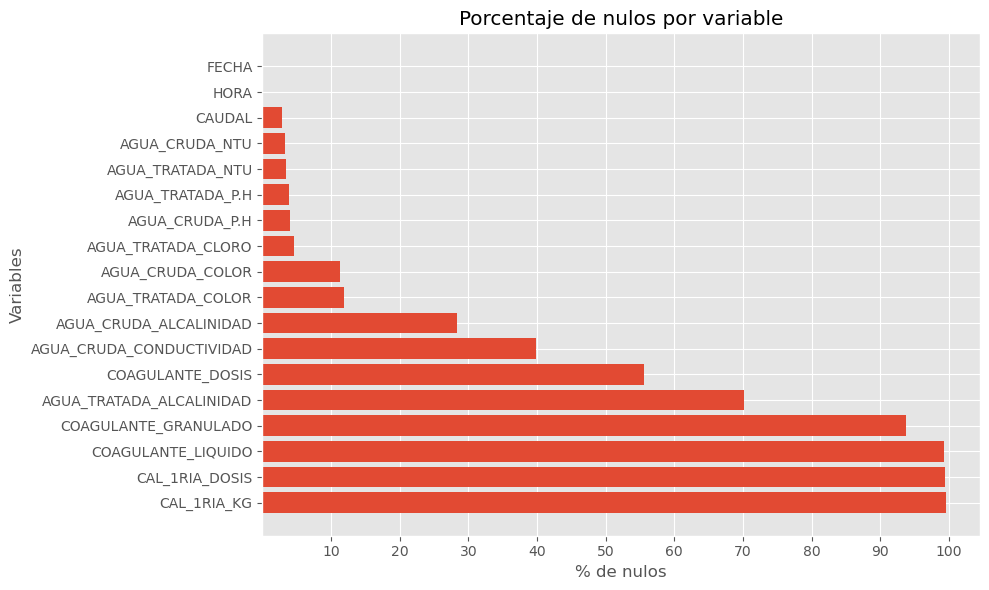

In [27]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(nulos["Variables"], nulos["% de nulos"])
ax.set_xlabel("% de nulos")
ax.set_ylabel("Variables")
ax.set_title("Porcentaje de nulos por variable")
plt.xticks(range(10, 101, 10))

plt.tight_layout()
plt.show()

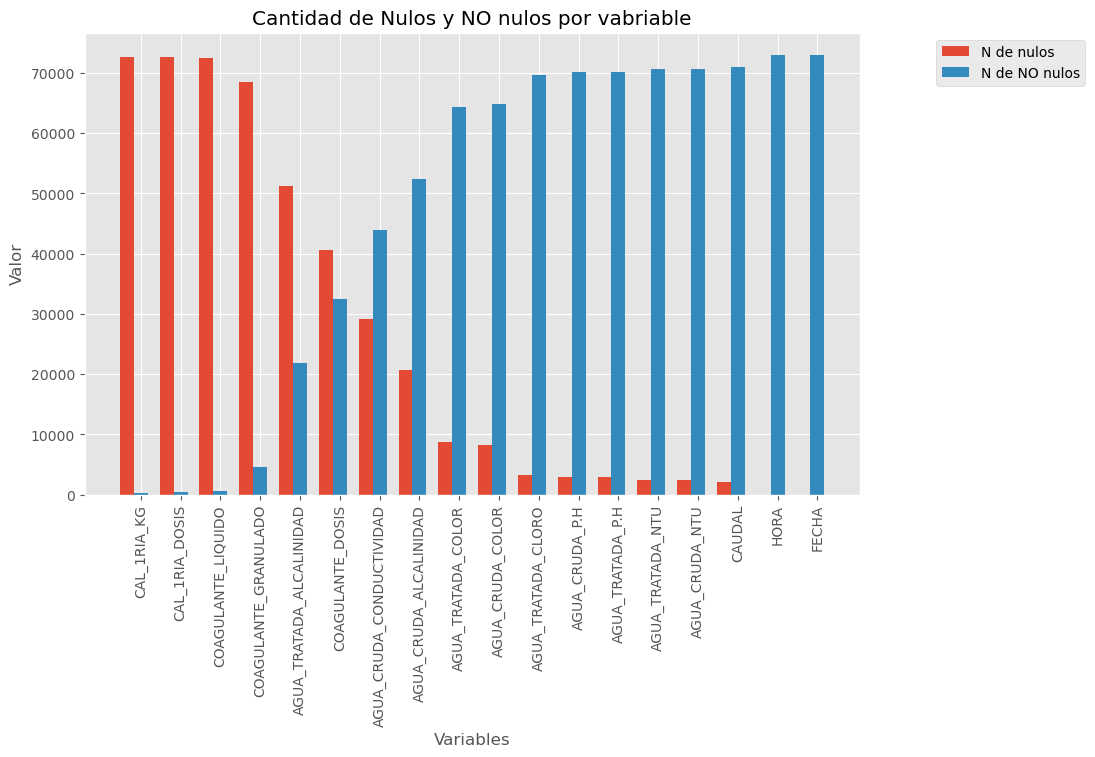

In [28]:
import numpy as np
fig, ax = plt.subplots(figsize=(10, 6))
n = len(nulos['Variables'])
x = np.arange(n)
width = 0.35
plt.bar(x - width, nulos["N de nulos"], width=width, label='N de nulos')
plt.bar(x, nulos["N de NO nulos"], width=width, label='N de NO nulos')
plt.xticks(x, nulos['Variables'],rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax.set_xlabel("Variables")
ax.set_ylabel("Valor")
ax.set_title("Cantidad de Nulos y NO nulos por vabriable")
plt.show()


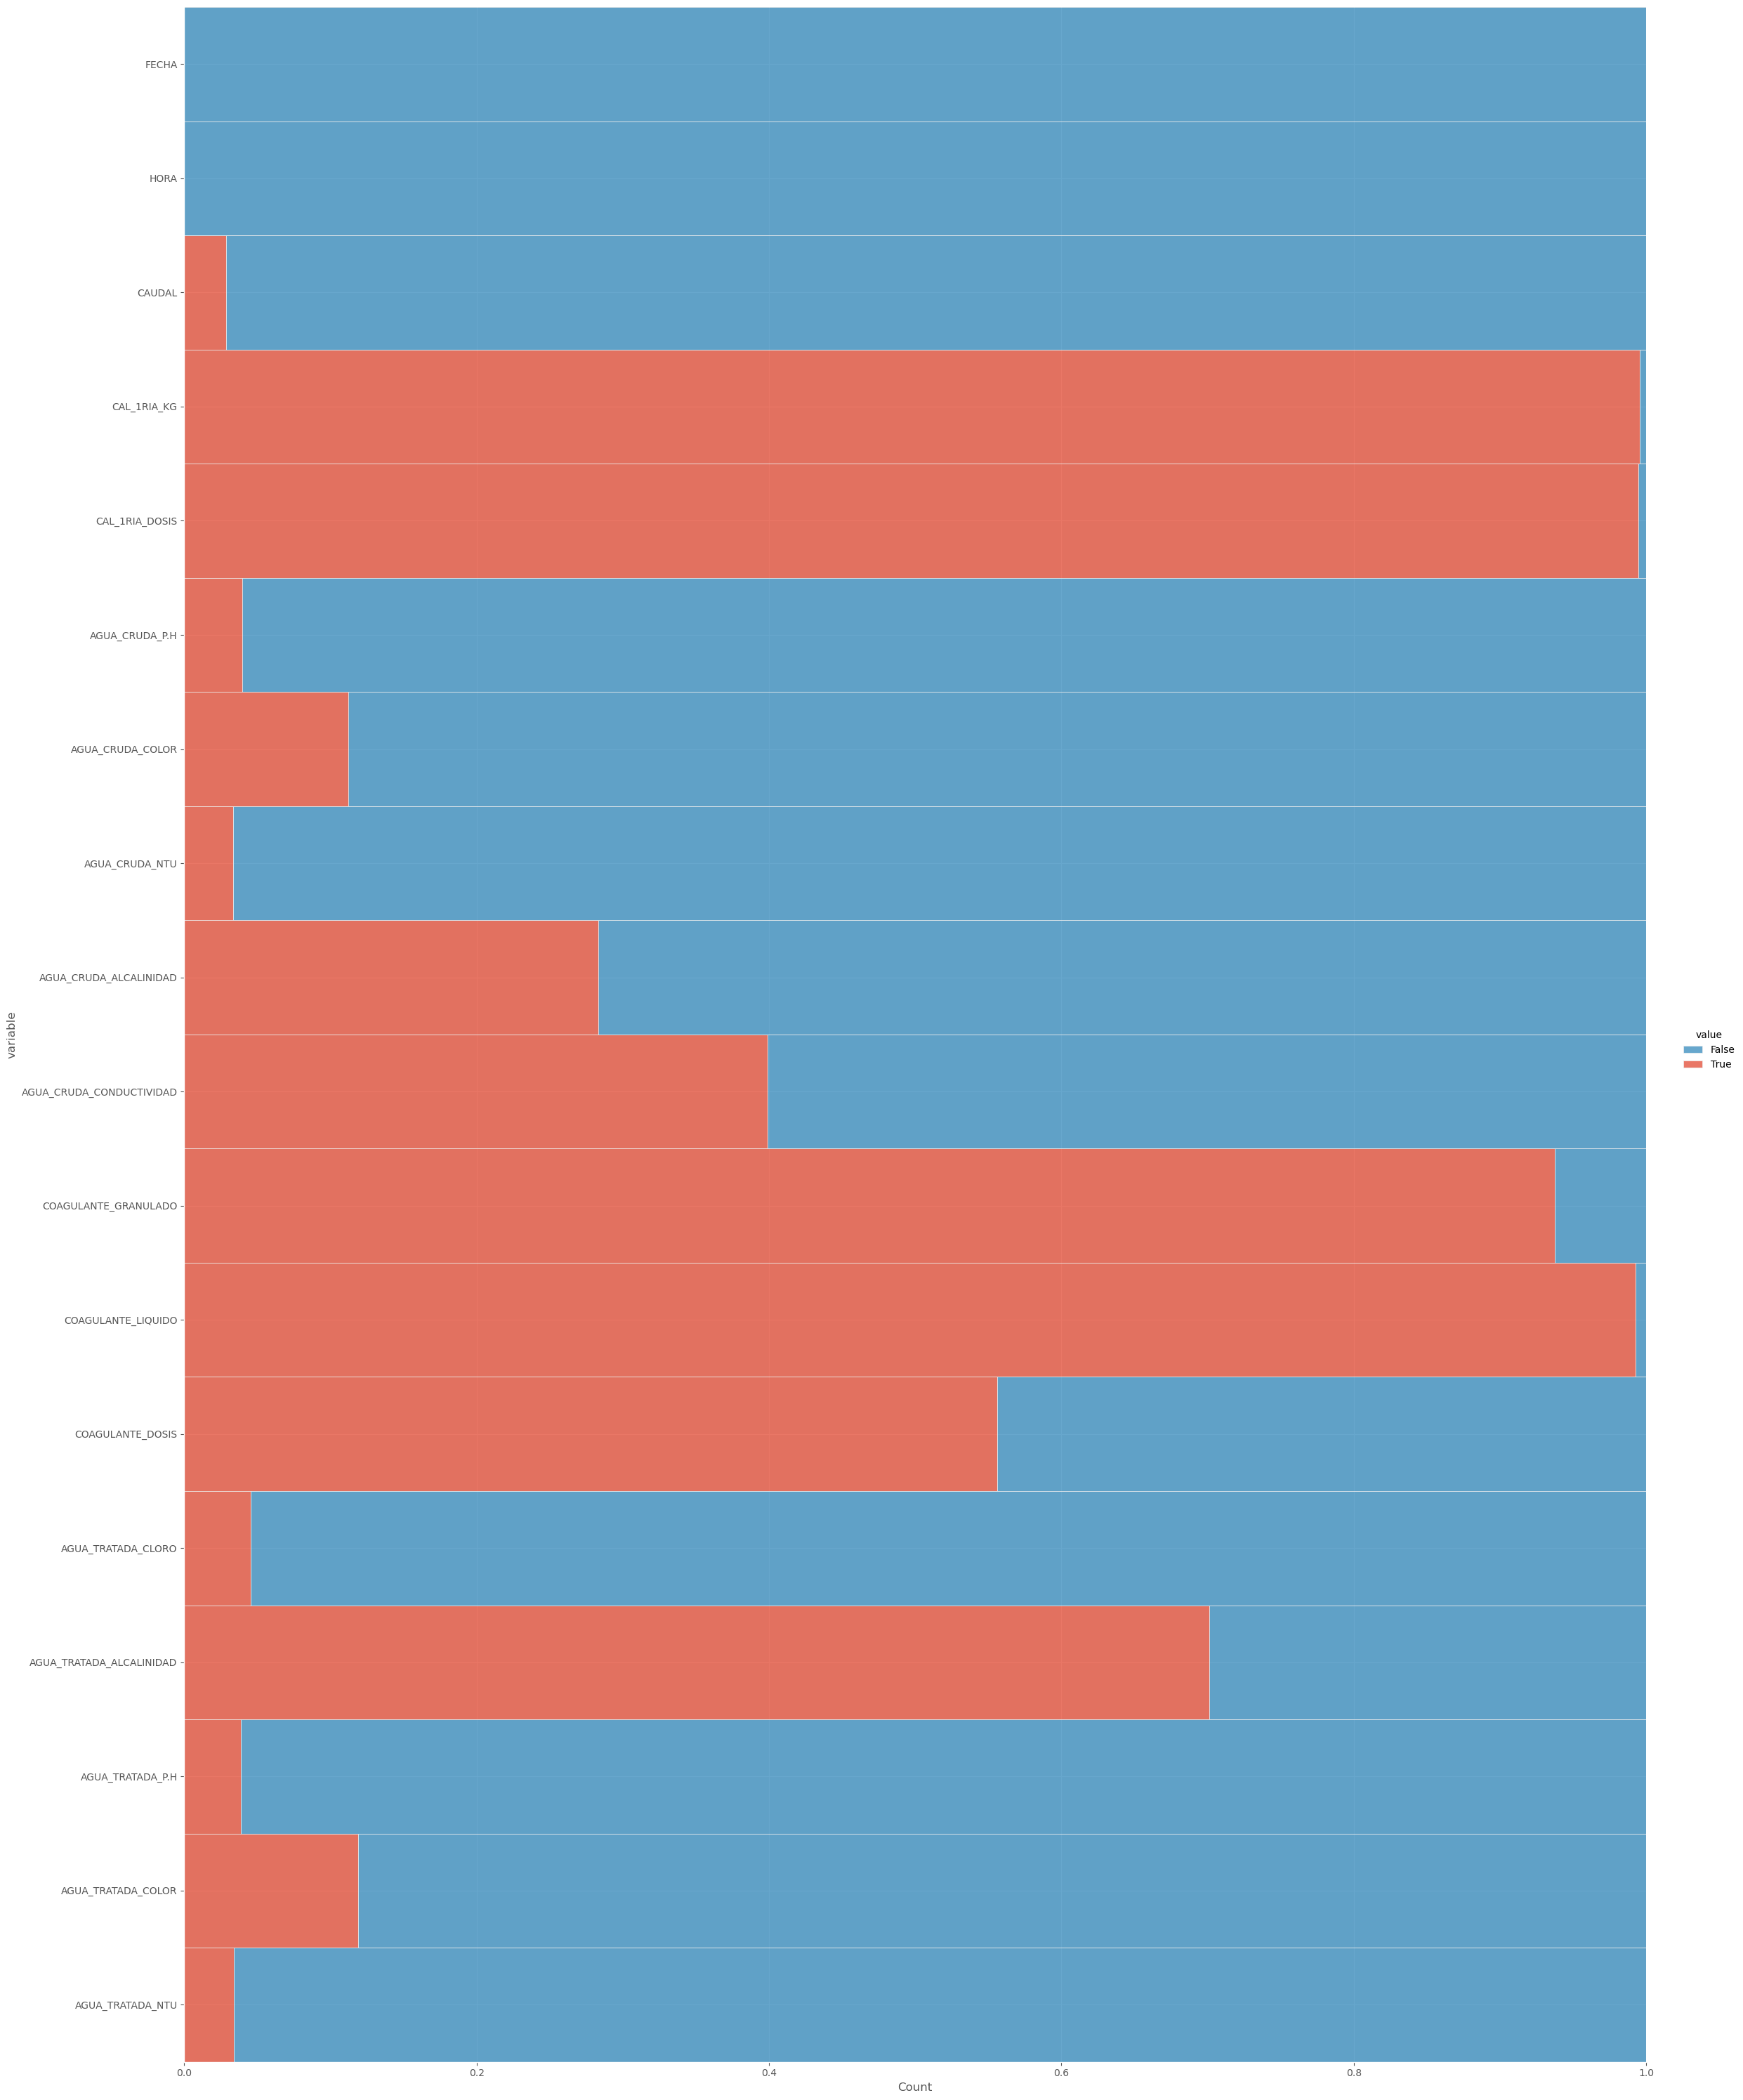

In [29]:

# establecer la paleta de colores personalizada
custom_palette = [ "#348abd","#e24a33"]
sns.set_palette(custom_palette)
df.isnull().melt().pipe(lambda df: (sns.displot(data=df,y='variable',hue='value',multiple='fill',height=30, aspect=8/10)))
plt.show()

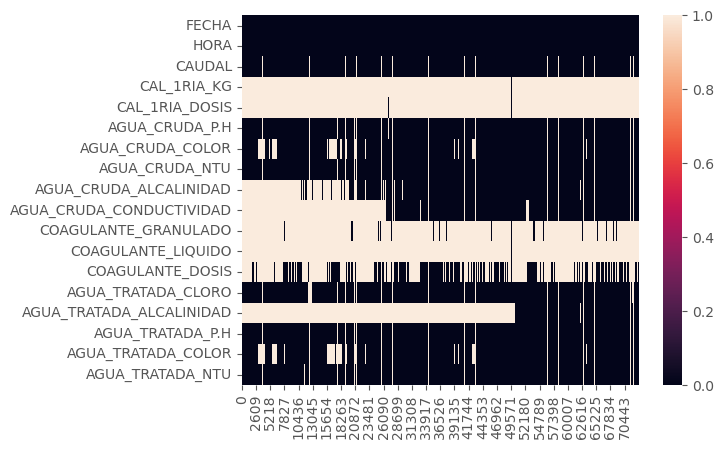

In [30]:
df.isnull().transpose().pipe(lambda df:(sns.heatmap(data=df)))
plt.show()

Se observa la relación de las variables con respecto a cada registro en general, dentro de los hallazgos se puede ver  que aproximadamente en los primero 51000 registros no hay valores para la alcalinidad

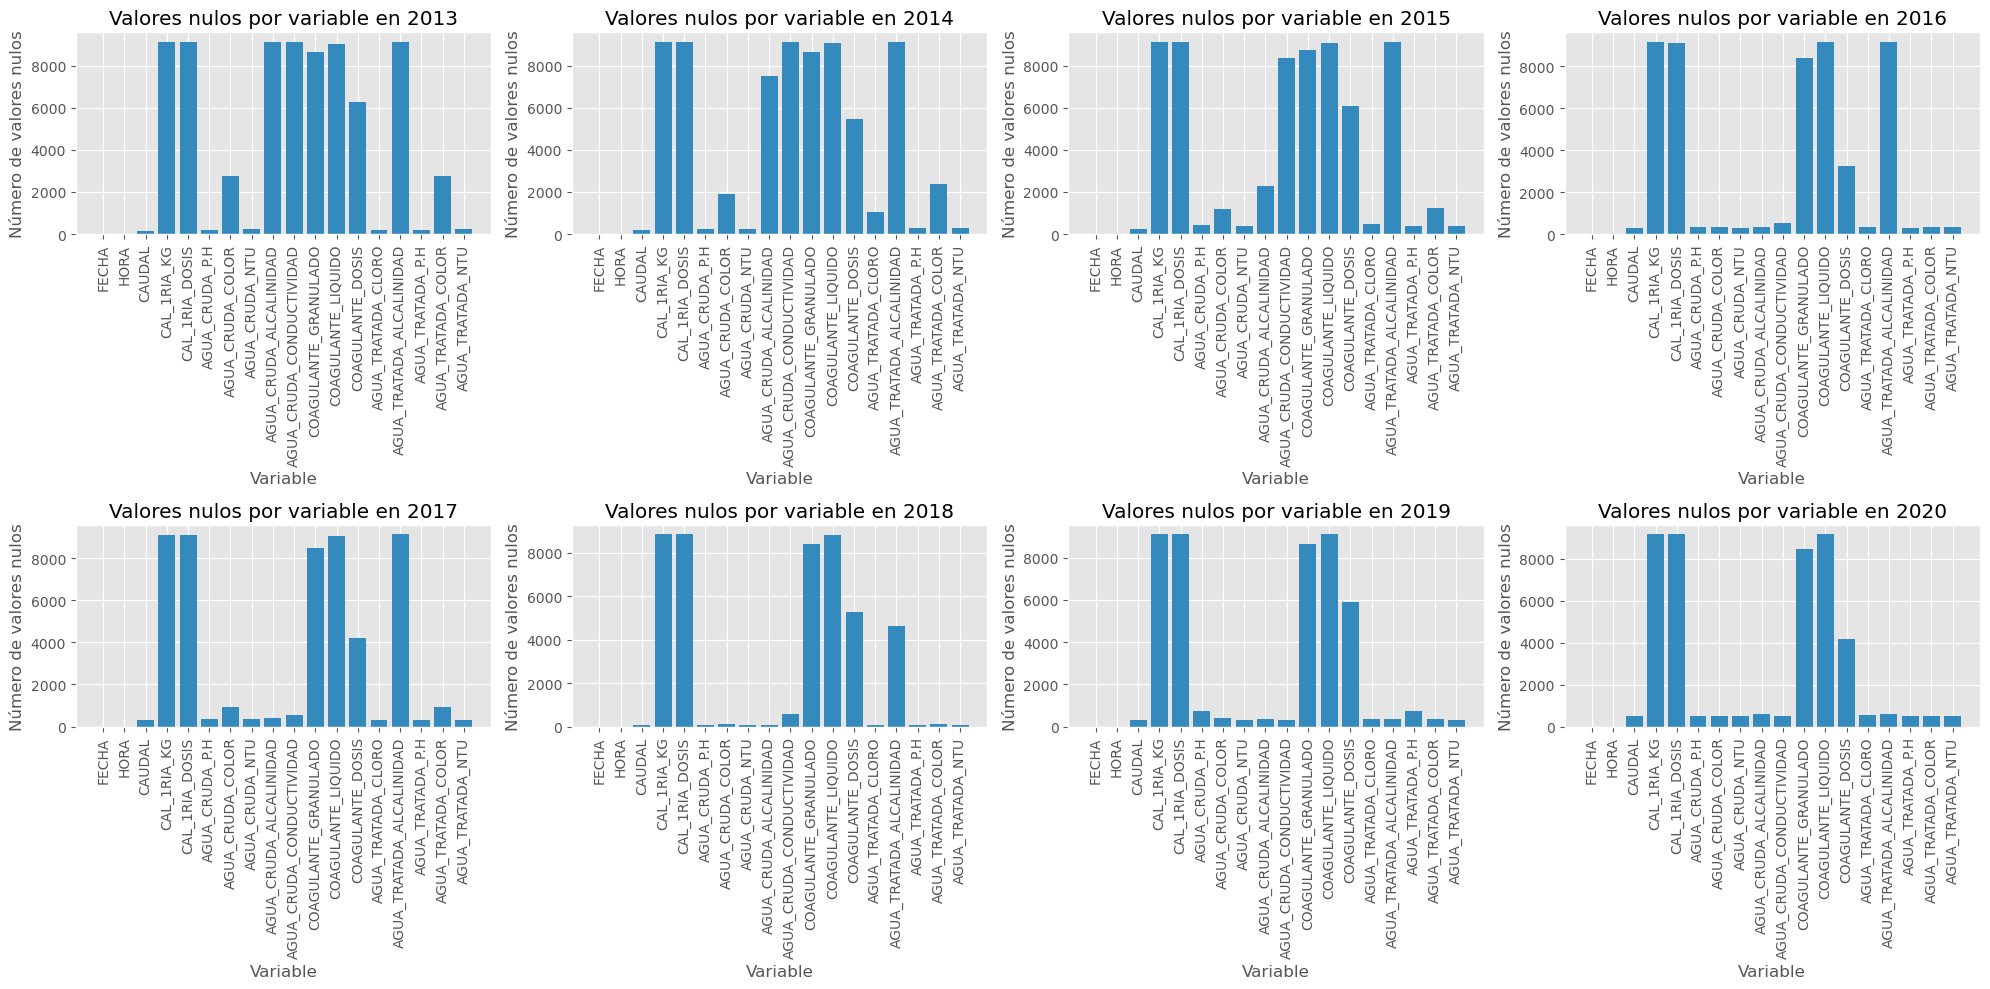

In [31]:
CONTEO_NULOS = df.groupby(df['FECHA'].dt.year).apply(lambda x: x.isnull().sum())
nrows = 2
ncols = 4
num_subplots = len(CONTEO_NULOS)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5,nrows*5))
for i, año in enumerate(CONTEO_NULOS.index):
    row = i // ncols
    col = i % ncols
    axes[row, col].bar(CONTEO_NULOS.columns, CONTEO_NULOS.loc[año])
    axes[row, col].set_title(f'Valores nulos por variable en {año}')
    axes[row, col].set_xlabel('Variable')
    axes[row, col].set_ylabel('Número de valores nulos')
    axes[row, col].tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.show()